# Digital image processing, part III:

# Edge detection and mathematical morphology

See on LiaScript https://liascript.github.io/course/?https://raw.githubusercontent.com/HueblerPatricia/LiaScriptTUBAF/main/EdgeDetection.md

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

## A picture to work with

You may also use own pictures and import them using ...

In [ ]:
import matplotlib.image as mpimg
pict = mpimg.imread('path')

Other oportunity: use a Pyton example picture(see code below) (Remark: May slow down your computer in later processing steps.)

In [ ]:
racoon = misc.face()
plt.imshow(racoon)
plt.show()
racoon.shape

### Create a picture

#### Some colors

In [2]:
red           = [255,0  ,0  ]
red_violet    = [255,0  ,64 ]
red_wine      = [191,0  ,26 ]
dark_red      = [64 ,0  ,0  ]
green         = [0  ,255,0  ]
blue          = [0  ,0  ,255]
dark_blue     = [0  ,0  ,124]
bright_blue   = [26 ,26 ,255]
brown         = [145,111,124]
purple        = [255,0  ,255]
violet        = [126,0  ,255]
yellow        = [255,255,0  ]
deep_yellow   = [255,166,0  ]
orange        = [255,212,45 ]
cyan          = [0  ,255,255]
blue_green    = [0  ,255,128]
blueish_green = [0  ,255,64 ]
white         = [255,255,255]
black         = [0  ,0  ,0  ]

#### Some color lists -> choose one!

In [4]:
colorList_red = [red, red_wine, dark_red, yellow, deep_yellow, orange, brown]
colorList_cyan = [green, blue, cyan, blue_green, blueish_green, dark_blue, bright_blue]

colorList = colorList_cyan

#### Array with 3 color layers as test image

In [5]:
def rotateList(lst, rot):

    '''Rotates a given list

    Parameters
    ----------
    lst : list
        list with entries of any data type
    rot : integer
        number of entries for the list to be rotated

    Returns
    -------
    list
        the rotated list
    '''
    l2 = lst[rot:] + lst[:rot]
    return l2

#### Function to draw picture

In [6]:
#define the picture's side length
pictSize = 120

def drawSquares(colorList, pictSize):

    '''creates a square shaped picture from colored squares

    Parameters
    ----------
    colorList : list
        list of rgb colors to use
    pictSize : integer
        side length of the future picture

    Returns
    -------
    2D array
        the ready and normed kernel
    '''

    pictSize = pictSize//len(colorList)
    squareLen = pictSize
    pictSize *= len(colorList)
    pictarray = np.zeros([pictSize, pictSize, 3], dtype=np.uint8) #3 layers for r,g,b


    lsta = 0
    lstp = squareLen
    for lines in range(0,len(colorList)):
        csta = 0
        cstp = squareLen
        for col in range(0,len(colorList)):
            pictarray[lsta:lstp,csta:cstp] = colorList[col]
            csta += squareLen
            cstp += squareLen
        lsta += squareLen
        lstp += squareLen
        colorList = rotateList(colorList,-2)
    return pictarray

#### Plot the picture

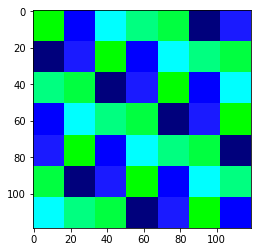

(119, 119, 3)

In [8]:
pictarray = drawSquares(colorList, pictSize)

plt.imshow(pictarray)
plt.show()
pictarray.shape

"shape" gives you: (y, x, 3) = (height, length, layers)
 -> 3 color layers, that means rgb <br>
 -> convert to grayscale to only work with one layer!

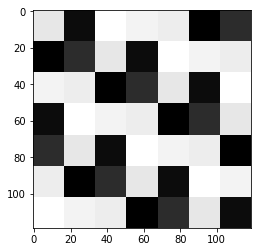

(119, 119)

In [24]:
from skimage.color import rgb2gray

gray = rgb2gray(pictarray)

plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()
gray.shape

## Edge detection

Literature for this chapter: Gonzalez, Woods: Digital Image Processing. Third Edition. PHI Learning Private Limited. New Delhi, 2008. Chapter 10

-> Edge detection = linear filtering with special filter masks

### Filter masks for edge detection

#### Roberts

In [14]:
roberts_45 = np.array([[0,-1],[1,0]], dtype = float)
roberts_135 = np.array([[-1,0],[0,1]], dtype = float)

#### Prewitt

In [15]:
prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]], dtype = float)
prewitt_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]], dtype = float)

prewitt_45 = np.array([[0,1,1],[-1,0,1],[-1,-1,0]], dtype = float)
prewitt_135 = np.array([[-1,-1,0],[-1,0,1],[0,1,1]], dtype = float)

#### Sobel

In [16]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = float)
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = float)

sobel_45 = np.array([[0,1,2],[-1,0,1],[-2,-1,0]], dtype = float)
sobel_135 = np.array([[-2,-1,0],[-1,0,1],[0,1,2]], dtype = float)

#### Laplace directional

In [17]:
laplace_x = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]], dtype = float)
laplace_y = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]], dtype = float)

laplace_45 = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]], dtype = float)
laplace_135 = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]], dtype = float)

### Functions for image filtering

For explanation see chapter "Digital image processing, part I: digital image filters".

#### Convolution function

In [18]:
def convolve(kernel,pictpart):

    '''convolution in 2D

    Parameters
    ----------
    kernel : 2D array of numbers
       the filter mask to use
       
    pictpart : 2D array of numbers
       currently active part of the picture
    

    Returns
    -------
    float
       the new color value
    '''
    
    
    s = 0.0
    temparr=np.multiply(kernel,pictpart)
    s = sum(temparr)
    s = sum(s)
    return s

#### Filter process

In [19]:
def filter_image(pict, kernel):

    '''image filtering

    Parameters
    ----------
    pict : 2D array of numbers
       an image of grayscale values

    kernel : 2D array of numbers
       the filter mask to use

    Returns
    -------
    2D array
       the modified grayscale image
    '''
    
    newpict = pict[0:][0:].copy()
    newpict.fill(0)
    
    pictpart = kernel.copy()
    pictpart.fill(0)

    for i in range(0+(kernel.shape[0]//2),  len(pict)-(kernel.shape[0])):
        for j in range(0+(kernel.shape[1]//2),  len(pict[1])-(kernel.shape[1])):
            
            for k in range(0,  (kernel.shape[0])):
                for l in range(0,  (kernel.shape[1])):
                    pictpart[k][l]=pict[i+k][j+l]
            newpict[i+(kernel.shape[0]//2)][j+(kernel.shape[1]//2)]=convolve(kernel, pictpart)
    return newpict

### Try out every filter

#### Sobel

In [25]:
img_sobel_x = filter_image(gray, sobel_x)
img_sobel_y = filter_image(gray, sobel_y)
img_sobel_45 = filter_image(gray, sobel_45)
img_sobel_135 = filter_image(gray, sobel_135)

#### Prewitt

In [26]:
img_prewitt_x = filter_image(gray, prewitt_x)
img_prewitt_y = filter_image(gray, prewitt_y)
img_prewitt_45 = filter_image(gray, prewitt_45)
img_prewitt_135 = filter_image(gray, prewitt_135)

#### Laplace directional

In [27]:
img_laplace_x = filter_image(gray, laplace_x)
img_laplace_y = filter_image(gray, laplace_y)
img_laplace_45 = filter_image(gray, laplace_45)
img_laplace_135 = filter_image(gray, laplace_135)

### Results

#### Different directions of Prewitt filter

Text(0.5, 1.0, '2nd diagonal')

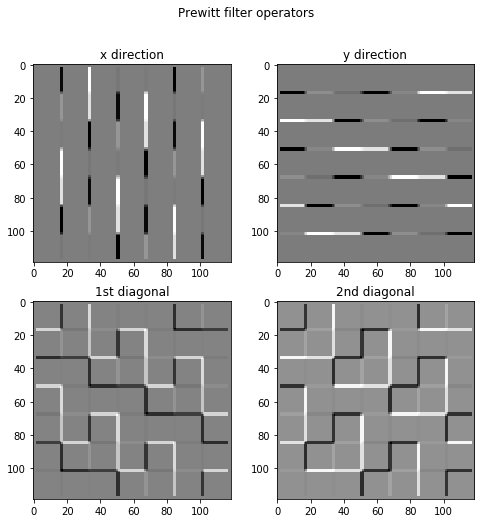

In [28]:
cmap = plt.get_cmap('gray')

fig = plt.figure(figsize=(8,8))
plt.suptitle('Prewitt filter operators')
sub1 = plt.subplot(2, 2, 1)
sub1.imshow(img_prewitt_x, cmap = cmap)
sub1.set_title('x direction')
sub2 = plt.subplot(2, 2, 2)
sub2.imshow(img_prewitt_y, cmap = cmap)
sub2.set_title('y direction')
sub3 = plt.subplot(2, 2, 3)
sub3.imshow(img_prewitt_45, cmap = cmap)
sub3.set_title('1st diagonal')
sub4 = plt.subplot(2, 2, 4)
sub4.imshow(img_prewitt_135, cmap = cmap)
sub4.set_title('2nd diagonal')



#### Compare Prewitt and Sobel

Sobel is a little stronger than Prewitt because of the filter mask's higher absolute values.

Text(0.5, 1.0, 'Sobel')

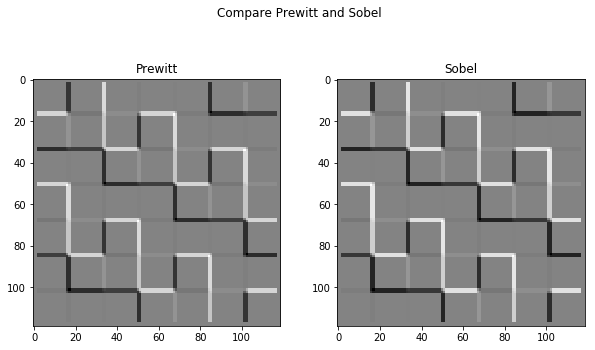

In [32]:
cmap = plt.get_cmap('gray')

fig = plt.figure(figsize=(10,10))
plt.suptitle('Compare Prewitt and Sobel')
sub1 = plt.subplot(2, 2, 1)
sub1.imshow(img_prewitt_45, cmap = cmap)
sub1.set_title('Prewitt')
sub2 = plt.subplot(2, 2, 2)
sub2.imshow(img_sobel_45, cmap = cmap)
sub2.set_title('Sobel')

#### Compare Sobel, Prewitt and Laplace directional

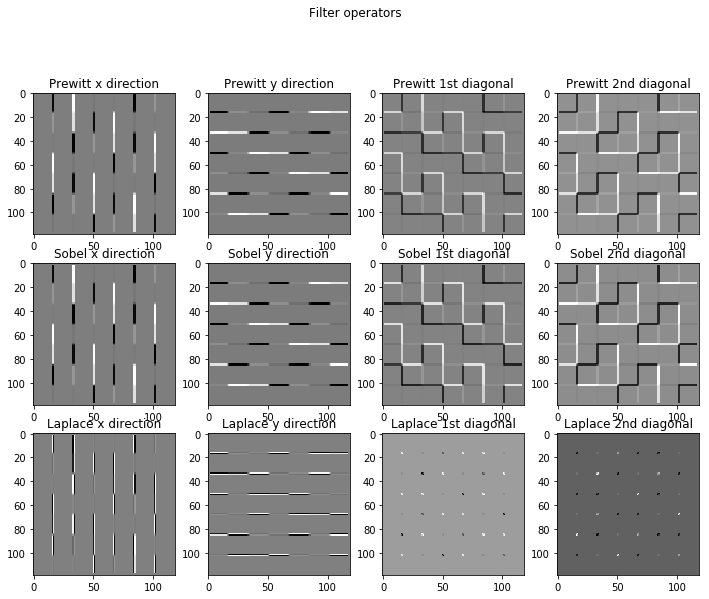

In [30]:
cmap = plt.get_cmap('gray')

imgs = [img_prewitt_x, 
        img_prewitt_y, 
        img_prewitt_45, 
        img_prewitt_135,
        img_sobel_x, 
        img_sobel_y, 
        img_sobel_45, 
        img_sobel_135,
        img_laplace_x,
        img_laplace_y,
        img_laplace_45,
        img_laplace_135
        ]
titles = ["Prewitt x direction", 
          "Prewitt y direction", 
          "Prewitt 1st diagonal", 
          "Prewitt 2nd diagonal",
          "Sobel x direction", 
          "Sobel y direction", 
          "Sobel 1st diagonal", 
          "Sobel 2nd diagonal",
          "Laplace x direction", 
          "Laplace y direction", 
          "Laplace 1st diagonal", 
          "Laplace 2nd diagonal"
          ]

fig = plt.figure(figsize=(12,12))
plt.suptitle('Filter operators')
i = 0
for elem in imgs:
    i += 1
    subi = plt.subplot(4, 4, i)
    subi.imshow(elem, cmap = cmap)
    subi.set_title(titles[i-1])


#### Roberts filter

The filter mask is just 2x2. Because of that the results contain narrower lines.

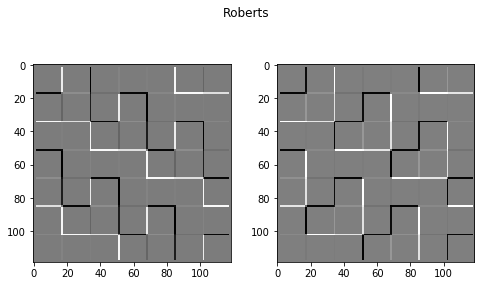

In [33]:
img_roberts_45 = filter_image(gray, roberts_45)
img_roberts_135 = filter_image(gray, roberts_135)

cmap = plt.get_cmap('gray')

fig = plt.figure(figsize=(8,8))
plt.suptitle('Roberts')
sub1 = plt.subplot(2, 2, 1)
sub1.imshow(img_roberts_45, cmap = cmap)
sub2 = plt.subplot(2, 2, 2)
sub2.imshow(img_roberts_135, cmap = cmap)

## Point detection

Point detection = edge detection in different directions

### Using Sobel

One opportunity: Add Sobel filtered images of all directions.

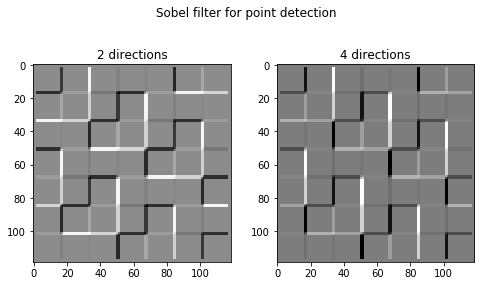

In [44]:
img_sobel_2 = 0.5 * (img_sobel_x + img_sobel_y)
img_sobel_4 = 0.25 * (img_sobel_x + img_sobel_y + img_sobel_45 + img_sobel_135)

fig = plt.figure(figsize=(8,8))
plt.suptitle('Sobel filter for point detection')
sub1 = plt.subplot(2, 2, 1)
sub1.imshow(img_sobel_2, cmap = cmap)
sub1.set_title('2 directions')
sub2 = plt.subplot(2, 2, 2)
sub2.imshow(img_sobel_4, cmap = cmap)
sub2.set_title('4 directions')
plt.imshow(img_sobel, cmap = cmap)
plt.show()

### The Laplacian operator

Better opportunity: Use a filter mask that needs only one step to do what we want.

In [34]:
laplace = np.array([[1,1,1],[1,-8,1],[1,1,1]], dtype = float) 

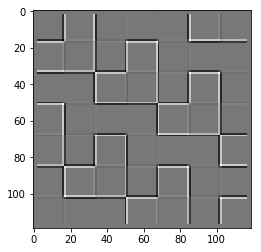

In [35]:
img_laplace = filter_image(gray, laplace)

plt.imshow(img_laplace, cmap = cmap)
plt.show()

### Some additional words

Edge detection is useful for seeing shapes in CT images, for example, but also interesting in any other picture. <br> <br>

Is is easily possible to increase or decrease strength of the gradient or change to a certain direction that is interesting.<br> <br>

Is is also possible to change the size of the filter mask, that will give you only wider edges, not the smallest ones.<br> <br>

You can also take the edges and combine them with any result of filtering. For example, you first take the edges and only blur them or the other way around: You take the edges, blur the rest and add the original edges back onto the picture.<br> <br>

$ \textbf{There are many opportunities to use image filters and edge detection. Just try out, if you are interested!} $